In [1]:
# https://www.kaggle.com/manmeetkaur07/eda-with-movie-lens-dataset-- Nice EDA
import pyforest
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [2]:
column_names = ['user_id', 'item_id', 'rating','timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
df.shape

(100000, 4)

In [4]:
df[['user_id', 'item_id']].describe()

,user_id,item_id
count,100000.00000,100000.000000
mean,462.48475,425.530130
std,266.61442,330.798356
min,1.00000,1.000000
25%,254.00000,175.000000
50%,447.00000,322.000000
75%,682.00000,631.000000
max,943.00000,1682.000000


In [5]:
print(df.user_id.nunique())
print(df.item_id.nunique())

943
1682


In [6]:
temp = np.sort(df.user_id.unique()) == np.arange(1, 944)
for i in range(len(temp)):
    if temp[i] == False:
        print('something wrong')
print('users ok')

temp = np.sort(df.item_id.unique()) == np.arange(1, 1683)
for i in range(len(temp)):
    if temp[i] == False:
        print('something wrong')
print('items ok')

users ok
items ok


In [7]:
n_users = df.user_id.nunique() 
n_items = df.item_id.nunique()

# create and initialise adjacency matrices
# adj for binary ratings
adj = np.zeros((n_users, n_items))
print(adj.shape)

# adjr for integer ratings
adjr = np.zeros((n_users, n_items))
print(adjr.shape)

(943, 1682)
(943, 1682)


In [8]:
df = df[['user_id', 'item_id', 'rating']]
df.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [9]:
df.rating.value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

In [34]:
# fill the adjacency matrices
for index, row in df.iterrows():
    u = row['user_id'] - 1
    i = row['item_id'] - 1
    rating = row['rating']
    adj[u][i] = 1
    adjr[u][i] = rating
# (subtracting 1 from u and i to make it 0-indexed)

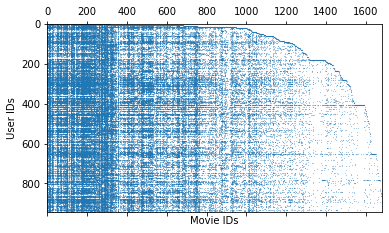

In [45]:
plt.spy(adj, markersize=0.1)
plt.xlabel('Movie IDs')
plt.ylabel('User IDs')
plt.show()

In [47]:
movie_degrees = adj.sum(axis = 0)
movie_degrees.shape

(1682,)

In [48]:
user_degrees = adj.sum(axis = 1)
user_degrees.shape

(943,)

In [51]:
print('Max movies by a user: ', user_degrees.max())
print('Min movies by a user: ', user_degrees.min())
print('Avg movies by a user: ', round(user_degrees.mean(), 1))

print('Most viewers for a movie: ', movie_degrees.max())
print('Least viewers for a movie: ', movie_degrees.min())
print('Avg viewers for a movie: ', round(movie_degrees.mean(), 1))

Max movies by a user:  737.0
Min movies by a user:  20.0
Avg movies by a user:  106.0
Most viewers for a movie:  583.0
Least viewers for a movie:  1.0
Avg viewers for a movie:  59.5


Text(0, 0.5, '# Movies watched')

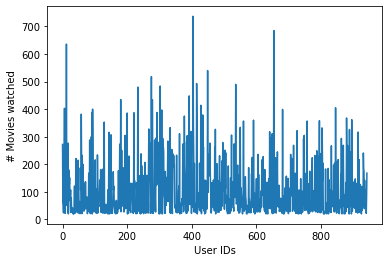

In [53]:
plt.plot(user_degrees)
plt.xlabel('User IDs')
plt.ylabel('# Movies watched')

Text(0, 0.5, '# Views')

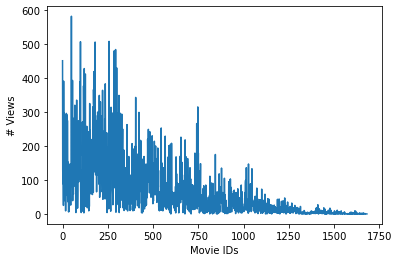

In [54]:
plt.plot(movie_degrees)
plt.xlabel('Movie IDs')
plt.ylabel('# Views')

In [56]:
# save the adjacency matrices "adj" and "adjr" as npy files for future use
np.save('adj.npy', adj)
np.save('adjr.npy', adjr)